# Plot the memory usage of both platforms

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from glob import glob
import numpy as np
from matplotlib.lines import Line2D
from matplotlib.axes import Axes 

In [2]:
minerva = pd.read_csv('final_results/minerva-all-usage.csv',index_col=0)

In [3]:
avemems = minerva.avemem.tolist()
ams = [float(am.split()[0])/1000 for am in avemems] # MB to GB
minerva['avemem'] = ams

In [4]:
maxmems = minerva.maxmem.tolist()
mms = [float(mm.split()[0])/1000 for mm in maxmems] # MB to GB
minerva['maxmem'] = mms

## Minerva Average Memory Usage

In [5]:
orders =['pf1','pf2','pf3','elegans','pacificus','remanei','drosophila','thaliana']

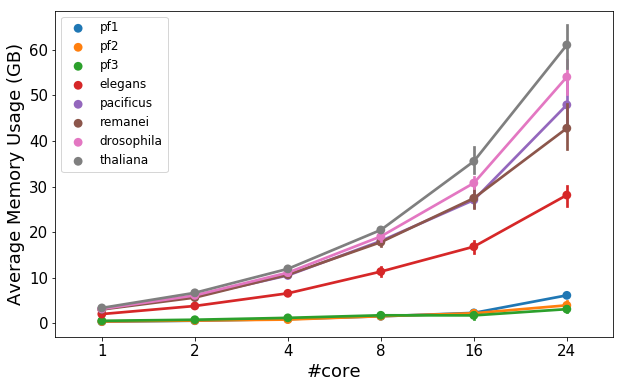

In [6]:
fig = plt.figure(figsize=(10,6))
sns.pointplot(data=minerva,y='avemem',x='cores',order=[1,2,4,8,16,24],hue='data',hue_order=orders)
plt.xlabel('#core',fontsize=18)
plt.ylabel('Average Memory Usage (GB)', fontsize=18)
plt.tick_params(labelsize=15,axis='both')
plt.legend(loc=2, prop={'size': 12})
plt.savefig('final_results/minerva_avemem.pdf',bbox_inches='tight')
plt.show()
plt.close()

In [7]:
spark = pd.read_csv('Spark/demeter_spark_comprehensive_stats_all_data.csv')
spark['mprof_mean_mem'] = spark['mprof_mean_mem']/1000 # MB to GB

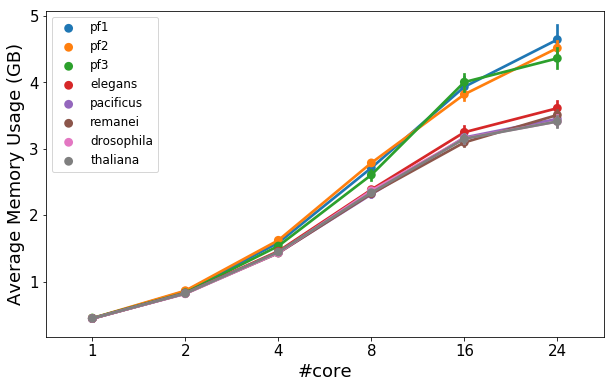

In [8]:
f = plt.figure(figsize=(10,6))
sns.pointplot(data=spark,y='mprof_mean_mem',x='#cores',order=[1,2,4,8,16,24],hue='data',hue_order=orders)
plt.xlabel('#core',fontsize=18)
plt.ylabel('Average Memory Usage (GB)', fontsize=18)
plt.tick_params(labelsize=15,axis='both')
plt.legend(loc=2, prop={'size': 12})
plt.savefig('final_results/spark_avemem.png',bbox_inches='tight')
plt.show()
plt.close()